## QuasarNET Performance vs training set size
#### Plot to show performance of QuasarNET as a function of the size of the training set
xxx

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import fitsio
from astropy.io import fits
from astropy.table import Table, join
from tensorflow.keras.models import load_model
from quasarnet.io import read_data, read_truth
from quasarnet.utils import process_preds, absorber_IGM, Wave
%matplotlib inline

from quasarnet.notebook_utils import *

from utils import *

In [27]:
qnet_path = '/global/homes/j/jfarr/Projects/QuasarNET/'
figsize = (18,6.5)
fontsize = 18

plt.rc('font', size=fontsize)

### Load the results from the different QN models

In [28]:
## QN parameters
n_lines = 1
c_th = 0.8
include_cmax_qn = True

In [29]:
f_truth = qnet_path+'/data/truth_DR12Q.fits'
truth = read_truth([f_truth])

In [30]:
data = {}

## Load the VI data.
#f_sdrq = '/global/projecta/projectdirs/sdss/staging/dr12/boss/qso/DR12Q/Superset_DR12Q.fits'
#data['VI'] = load_sdrq_data(f_sdrq)

## Load the QN data.
#f_qn = '../results/qn_results/qn_performance_vs_training_set_size/qn_90pc.fits'
#data['QN_90'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

"""## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet.fits'
data['QN5_90'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test.fits'
data['QN5_test_90'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_mkl.fits'
data['QN5_test_mkl_90'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)"""

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_0.1.fits'
data['QN50_10'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_0.1_again.fits'
data['QN50_again_10'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_0.1_1.fits'
data['QN50_1_10'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_0.1.fits'
data['QN50_test_10'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_0.1_again.fits'
data['QN50_test_again_10'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_0.1_1.fits'
data['QN50_test_1_10'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_mkl_0.1.fits'
data['QN50_test_mkl_10'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_mkl_0.1_again.fits'
data['QN50_test_mkl_again_10'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_mkl_0.1_1.fits'
data['QN50_test_mkl_1_10'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
#f_qn = '../results/qn_results/qn_performance_vs_training_set_size/qn_10pc.fits'
#data['QN_10'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
#f_qn = '../results/qn_results/qn_tf2_test.fits'
#data['QNtf2_10'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
#f_qn = '../results/qn_results/qn_performance_vs_training_set_size/qn_5pc.fits'
#data['QN_5'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
#f_qn = '../results/qn_results/qn_performance_vs_training_set_size/qn_2.5pc.fits'
#data['QN_2.5'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

## Load the QN data.
#f_qn = '../results/qn_results/qn_performance_vs_training_set_size/qn_1pc.fits'
#data['QN_1'] = load_qn_data(f_qn,n_lines=n_lines,c_th=c_th,include_cmax=include_cmax_qn)

### Find the set of common targetids, and reduce all data to that set
This finds which targetids* are common to all datasets, and removes any that are not common. It then matches the data from each classifier to each targetid, and produces a single data table.

\* targetid = plate$\times$1000000000 + mjd$\times$10000 + fiber

In [31]:
data_table = reduce_data_to_table(data,truth,include_cmax_qn=include_cmax_qn)
data_table[:5]

INFO: 457474 common targetids


THING_ID,TARGETID,PLATE,MJD,FIBERID,ZCONF_PERSON,Z_VI,CLASS_VI,ISQSO_VI,Z_QN50_10,Z_QN50_again_10,Z_QN50_1_10,Z_QN50_test_10,Z_QN50_test_again_10,Z_QN50_test_1_10,Z_QN50_test_mkl_10,Z_QN50_test_mkl_again_10,Z_QN50_test_mkl_1_10,CLASS_QN50_10,CLASS_QN50_again_10,CLASS_QN50_1_10,CLASS_QN50_test_10,CLASS_QN50_test_again_10,CLASS_QN50_test_1_10,CLASS_QN50_test_mkl_10,CLASS_QN50_test_mkl_again_10,CLASS_QN50_test_mkl_1_10,ISQSO_QN50_10,ISQSO_QN50_again_10,ISQSO_QN50_1_10,ISQSO_QN50_test_10,ISQSO_QN50_test_again_10,ISQSO_QN50_test_1_10,ISQSO_QN50_test_mkl_10,ISQSO_QN50_test_mkl_again_10,ISQSO_QN50_test_mkl_1_10,CMAX_QN50_10,CMAX_QN50_again_10,CMAX_QN50_1_10,CMAX_QN50_test_10,CMAX_QN50_test_again_10,CMAX_QN50_test_1_10,CMAX_QN50_test_mkl_10,CMAX_QN50_test_mkl_again_10,CMAX_QN50_test_mkl_1_10
int64,int64,int64,int64,int64,int64,float64,str8,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,str8,str8,str8,str8,str8,str8,str8,str8,bool,bool,bool,bool,bool,bool,bool,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64
87897905,3586551810016,3586,55181,16,2,2.242,QSO,True,2.249,2.240,2.243,2.235,2.238,2.254,2.237,2.237,2.247,QSO,QSO,QSO,QSO,QSO,QSO,QSO,QSO,QSO,True,True,True,True,True,True,True,True,True,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
96907939,3586551810020,3586,55181,20,2,3.181,QSO,True,3.203,3.191,3.174,3.192,3.170,3.180,3.202,3.180,3.187,QSO,QSO,QSO,QSO,QSO,QSO,QSO,QSO,QSO,True,True,True,True,True,True,True,True,True,1.000,1.000,1.000,1.000,1.000,0.988,1.000,1.000,1.000
87896919,3586551810032,3586,55181,32,2,0.000,STAR,False,2.286,2.260,2.331,2.339,0.844,0.362,0.153,0.832,0.379,NONQSO,NONQSO,NONQSO,NONQSO,NONQSO,NONQSO,NONQSO,NONQSO,NONQSO,False,False,False,False,False,False,False,False,False,0.001,0.000,0.000,0.165,0.001,0.000,0.000,0.000,0.000
87897024,3586551810036,3586,55181,36,2,0.000,STAR,False,3.162,2.906,0.565,3.005,2.323,1.140,3.628,2.327,3.955,NONQSO,NONQSO,NONQSO,NONQSO,NONQSO,NONQSO,NONQSO,NONQSO,NONQSO,False,False,False,False,False,False,False,False,False,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
94817272,3586551810038,3586,55181,38,2,2.196,QSO,True,2.171,2.168,2.179,2.190,2.185,2.185,2.197,2.188,2.185,QSO,QSO,QSO,QSO,QSO,QSO,QSO,QSO,QSO,True,True,True,True,True,True,True,True,True,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [32]:
# Include only objects in the data table that have the highest confidence level.
data_table = data_table[data_table['ZCONF_PERSON']==2]
len(data_table)

441591

### Compare the performance of the different model/data combos.
xxx

In [33]:
ls = {'QN_90': '-',
      'QN_10': '--',
      'QN_5': '-.',
      'QN_2.5': '-.',
      'QN_1': ':',

      'QN5_90': '-',
      'QN5_test_90': '--',
      'QN5_test_mkl_90': '-.',

      'QN50_10': '-',
      'QN50_again_10': '-',
      'QN50_1_10': '-',
      'QN50_test_10': '--',
      'QN50_test_again_10': '--',
      'QN50_test_1_10': '--',
      'QN50_test_mkl_10': '-.',
      'QN50_test_mkl_again_10': '-.',
      'QN50_test_mkl_1_10': '-.',
     }

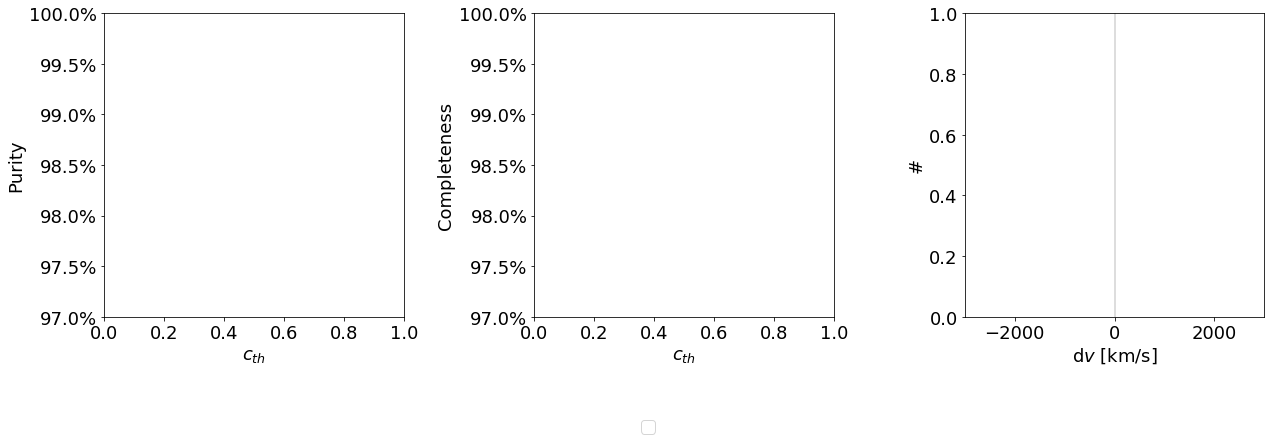

In [25]:
fig, axs = plt.subplots(1,3,figsize=(figsize[0],1*figsize[1]))

nspec_sdr12q = 627751
dv_max = 6000. #km/s

cth_min = 0.0
cth_max = 1.0
n_int = 100
c_th = np.arange(cth_min,cth_max,(1/n_int)*(cth_max-cth_min))
ndetect = 1

n_dv = 51
dv_bins = np.linspace(-3000.,3000,n_dv)

isqso_truth = (data_table['ISQSO_VI'] & (data_table['ZCONF_PERSON']==2))
isgal_truth = (data_table['CLASS_VI']=='GALAXY')
isbad = ((data_table['ZCONF_PERSON']=='BAD') | (data_table['ZCONF_PERSON']!=2))

for j,c in enumerate([k for k in data.keys() if 'QN' in k]):
    com = []
    pur = []
    
    z_c = data_table['Z_{}'.format(c)]
    zgood = (data_table['Z_VI']>0) & (abs(z_c-data_table['Z_VI']) < dv_max*(1+data_table['Z_VI'])/300000.)
    
    for cth in c_th:
        isqso_c = (data_table['CMAX_{}'.format(c)]>cth)>=ndetect
                
        pur_num = (isqso_c & (isqso_truth | isgal_truth) & zgood & ~isbad).sum()
        pur_denom = (isqso_c & (~isbad)).sum()
        
        com_num = (isqso_c & zgood & isqso_truth).sum()
        com_denom = (isqso_truth).sum()
        
        pur += [pur_num/pur_denom]
        com += [com_num/com_denom]
        

    axs[0].plot(c_th,pur,label='pur',color=colours['C0'],ls=ls[c])
    axs[1].plot(c_th,com,label='com',color=colours['C1'],ls=ls[c])
    
    ## Plot the dv histogram.
    dv = 300000. * (z_c-data_table['Z_VI']) / (1+data_table['Z_VI'])
    axs[2].hist(dv,bins=dv_bins,histtype='step',ls=ls[c],color=colours['C2'],label='{}%'.format(c.split('_',1)[1]))

for ax in axs[:2]:
    ax.set_xlabel(r'$c_{th}$')
    ax.set_xlim(0.,1.)
    ax.set_ylim(0.97,1.0)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0,decimals=1))

axs[0].set_ylabel('Purity')

axs[1].set_ylabel('Completeness')

axs[2].axvline(x=0,c='lightgrey',zorder=-1)
axs[2].set_ylabel(r'#')
axs[2].set_xlabel(r'd$v$ [km/s]')
axs[2].set_xlim(-3000.,3000.)

artists = []
labels = []
for j,c in enumerate([k for k in data.keys() if 'QN' in k]):
    artists += [axs[0].plot([0],[0],color='grey',ls=ls[c])[0]]
    p = float(c.split('_',1)[1])/100
    labels += ['{:.0%} DR12 Superset\n({:,} spectra)'.format(p,int(p*nspec_sdr12q))]

fig.legend(artists,labels,loc='lower center',borderaxespad=0,bbox_to_anchor=(0.5,0.03),ncol=len(artists))
rect = (0,0.15,1,1.0)
plt.tight_layout(rect=rect)
#plt.margins(x=0.1,y=0.1)

plt.savefig('../plots/qn_performance_vs_training_set_size_3panel.pdf')
plt.show()

cth: [0.17 0.18 0.19 0.2 ]
pur: [0.99351083 0.99364076 0.99372311 0.99384527]
com: [0.99375426 0.99371039 0.99361866 0.99357479]
QN50_10 has median velocity error -91.785 and standard deviation 865.472


/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in true_divide


cth: [0.18 0.19 0.2  0.21]
pur: [0.99357498 0.9936733  0.99377965 0.99389783]
com: [0.99380611 0.99376224 0.9937064  0.9936386 ]
QN50_again_10 has median velocity error -195.661 and standard deviation 836.483
cth: [0.1  0.11 0.12 0.13]
pur: [0.99380108 0.9939467  0.99409606 0.9942618 ]
com: [0.99408131 0.99400553 0.99389385 0.99381808]
QN50_1_10 has median velocity error -164.937 and standard deviation 810.187
cth: [0.84 0.85 0.86 0.87]
pur: [0.98700488 0.9874447  0.98779449 0.98826712]
com: [0.98804695 0.9877917  0.98750055 0.98722934]
QN50_test_10 has median velocity error -287.427 and standard deviation 1123.400
cth: [0.14 0.15 0.16 0.17]
pur: [0.99368627 0.99384782 0.99396192 0.99407617]
com: [0.99394969 0.99388987 0.99381808 0.99375825]
QN50_test_again_10 has median velocity error -183.233 and standard deviation 828.503
cth: [0.37 0.38 0.39 0.4 ]
pur: [0.99272548 0.99281203 0.99289467 0.99296919]
com: [0.99296457 0.99291671 0.99286885 0.99280105]
QN50_test_1_10 has median velocity

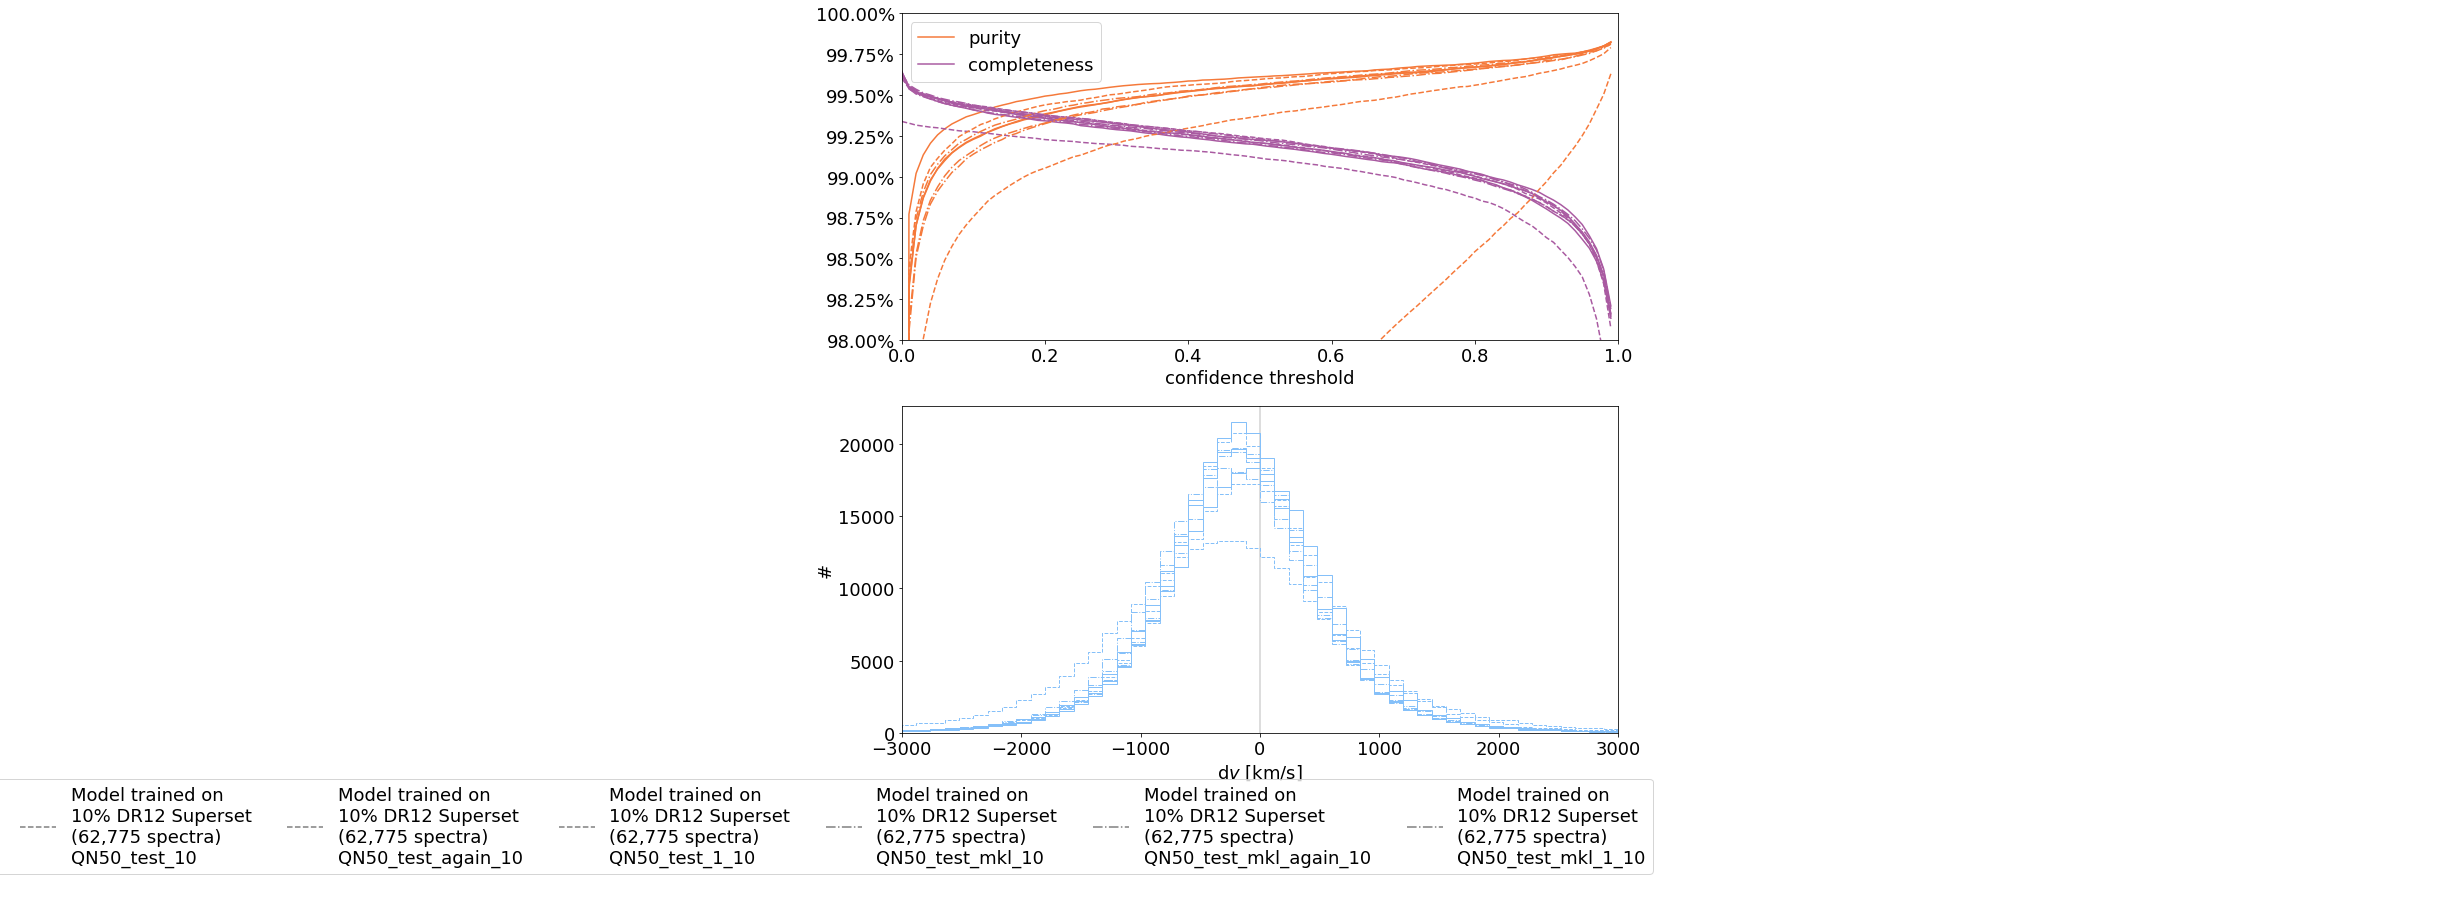

In [34]:
fig, axs = plt.subplots(2,1,figsize=(12,2*figsize[1]))

nspec_sdr12q = 627751
dv_max = 6000. #km/s

cth_min = 0.0
cth_max = 1.0
n_int = 100
c_th = np.arange(cth_min,cth_max,(1/n_int)*(cth_max-cth_min))
ndetect = 1

n_dv = 51
dv_bins = np.linspace(-3000.,3000,n_dv)

isqso_truth = (data_table['ISQSO_VI'] & (data_table['ZCONF_PERSON']==2))
isgal_truth = (data_table['CLASS_VI']=='GALAXY')
isbad = ((data_table['ZCONF_PERSON']=='BAD') | (data_table['ZCONF_PERSON']!=2))

artists = []
labels = []

for j,c in enumerate([k for k in data.keys() if 'QN' in k]):
    com = []
    pur = []
    
    z_c = data_table['Z_{}'.format(c)]
    zgood = (data_table['Z_VI']>-1) & (abs(z_c-data_table['Z_VI']) < dv_max*(1+data_table['Z_VI'])/300000.)
    
    for cth in c_th:
        isqso_c = (data_table['CMAX_{}'.format(c)]>cth)>=ndetect
                
        pur_num = (isqso_c & (isqso_truth | isgal_truth) & zgood & ~isbad).sum()
        pur_denom = (isqso_c & (~isbad)).sum()
        
        com_num = (isqso_c & zgood & isqso_truth).sum()
        com_denom = (isqso_truth).sum()
        
        pur += [pur_num/pur_denom]
        com += [com_num/com_denom]

    pur = np.array(pur)
    com = np.array(com)
    
    ind = np.where(pur>com)[0][0]
    print('cth:',c_th[ind-2:ind+2])
    print('pur:',pur[ind-2:ind+2])
    print('com:',com[ind-2:ind+2])
    if j==0:
        labelp = 'purity'
        labelc = 'completeness'
    else:
        labelp = None
        labelc = None
        
    axs[0].plot(c_th,pur,label=labelp,color=colours['C0'],ls=ls[c])
    axs[0].plot(c_th,com,label=labelc,color=colours['C1'],ls=ls[c])
    
    ## Plot the dv histogram.
    dv = 300000. * (z_c-data_table['Z_VI']) / (1+data_table['Z_VI'])
    dv_med = np.median(dv[abs(dv)<dv_max])
    dv_std = np.std(dv[abs(dv)<dv_max])
    print('{} has median velocity error {:3.3f} and standard deviation {:3.3f}'.format(c,dv_med,dv_std))
    axs[1].hist(dv,bins=dv_bins,histtype='step',ls=ls[c],color=colours['C2'],label='{}%'.format(c.split('_',1)[1]))
    
    ## Add objects to list of artists and labels for legend.
    artists += [axs[0].plot([0],[0],color='grey',ls=ls[c])[0]]
    p = float(c.split('_')[-1])/100
    labels += ['Model trained on\n{:.0%} DR12 Superset\n({:,} spectra)'.format(p,int(p*nspec_sdr12q))+'\n'+c]


axs[0].set_xlabel(r'confidence threshold')
axs[0].set_xlim(0.,1.)
axs[0].set_ylim(0.98,1.0)
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0,decimals=2))
axs[0].legend()

axs[1].axvline(x=0,c='lightgrey',zorder=-1)
axs[1].set_ylabel(r'#')
axs[1].set_xlabel(r'd$v$ [km/s]')
axs[1].set_xlim(-3000.,3000.)
    
fig.legend(artists,labels,loc='lower center',borderaxespad=0,bbox_to_anchor=(0.5,0.03),ncol=len(artists))
rect = (0,0.13,1.,1.)
plt.tight_layout(rect=rect)
#plt.margins(x=0.1,y=0.1)

#plt.savefig('../plots/qn_performance_vs_training_set_size_2panel.pdf')
plt.show()